In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
k = float(input("enter valve of reservoir rock permeability in md : "))
q = float(input("enter value of oil flow in standard bbl per day : "))
B0 = float(input("enter value of oil formation volume in bbl/STB : "))
viscosity = float(input("enter value of oil viscosity in cp : "))
h = float(input("enter value of thickness of reservoir in feet :"))
pe = float(input("enter value of reservoir boundary pressure in psi :"))
re = float(input("enter outer radius of reservoir in feet: "))
rw = float(input("enter wellbore radius in feet: "))

enter valve of reservoir rock permeability in md : 10
enter value of oil flow in standard bbl per day : 1000
enter value of oil formation volume in bbl/STB : 1.2
enter value of oil viscosity in cp : .5
enter value of thickness of reservoir in feet :100
enter value of reservoir boundary pressure in psi :2500
enter outer radius of reservoir in feet: 2000
enter wellbore radius in feet: .5


In [4]:
r = np.random.uniform(rw,re,8000)
r.sort()
df = pd.DataFrame({"r" : r})
df["p"] = pe - ((141.2*q*B0*viscosity*np.log(re/df["r"]))/(k*h))


In [5]:
def skin_effect(s,rs):
    plt.figure(figsize = (15,8))
    ks = (k*(np.log(rs/rw)))/(s + np.log(rs/rw))
    t = np.random.uniform(rw,rs,1000)
    t.sort()
    rf = pd.DataFrame({"t" : t})
    rf["q"] = pe - (141.2*q*B0*viscosity*(((np.log(re/rs))/k)+(np.log(rs/rf["t"]))/ks))/h
    plt.plot(df["r"],df["p"], c = "b" , label= " Pressure profile of undamaged well")
    plt.plot(rf["t"],rf["q"], c = "r", label= " Pressure profile of damaged well")
    plt.xlim(0.3,50)
    plt.ylim(1000,2500)
    plt.xlabel("radius from wellbore")
    plt.ylabel("reservoir pressure")
    plt.title("Skin and skin zone effect on reservoir pressure drowdown")
    plt.style.use('dark_background')
    plt.grid(True, color = 'g')

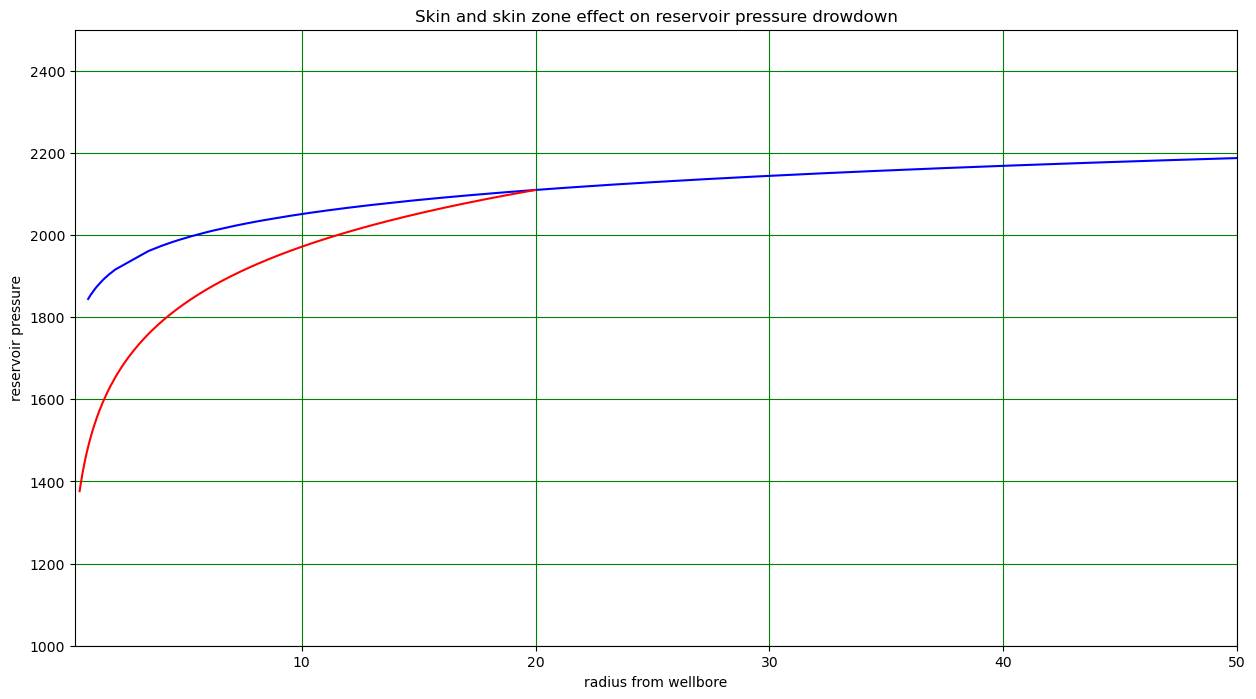

In [6]:
skin_effect(5,20)

In [7]:
from ipywidgets import interact,interactive

In [8]:
interactive(skin_effect , s =(-3,10,0.2), rs = (0.5,25,0.2))

interactive(children=(FloatSlider(value=3.0, description='s', max=10.0, min=-3.0, step=0.2), FloatSlider(value…